# Tu primer random forest con scikit-learn

In [24]:
#Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Utilizaremos el dataset **Pima indians diabetes** de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [25]:
#Cargamos dataset a utilizar
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploración de datos

In [26]:
#Visualizacion del dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


En este conjunto de datos hay 8 características  de entrada y 1 característica de salida / destino / target. 

El significado de los nombres de las características es el siguiente:

* Número de embarazos.
* Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
* Presión arterial diastólica (mm Hg).
* Espesor del pliegue cutáneo del tríceps (mm).
* Insulina sérica de 2 horas (mu U / ml).
* Índice de masa corporal (peso en kg / (altura en m) ^ 2).
* Función del pedigrí de la diabetes.
* Edad (años).
* Variable de clase (0 o 1).

In [27]:
#Analizamos el shape del objeto
df.shape

(768, 9)

In [28]:
#Visualizamos los tipos de datos
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Entrenamiento de random forest con scikit-learn

In [29]:
#Separamos en X e y
X=df.drop(columns=["Outcome"])
y=df["Outcome"]

In [30]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_trian,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [31]:
#Arbol de decision
from sklearn.ensemble import RandomForestClassifier

#Creacion del modelo

random_forest=RandomForestClassifier(n_estimators=42, random_state=42)


In [32]:
#Entrenamiento
random_forest.fit(X_trian,y_train)


RandomForestClassifier(n_estimators=42, random_state=42)

In [33]:
#Calculo de las predicciones en Train y Test
y_train_pred=random_forest.predict(X_trian)
y_test_pred=random_forest.predict(X_test)

## Evaluación del modelo

In [34]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
print(accuracy_score(y_train,y_train_pred))

#Calculo el accuracy en Test
print(accuracy_score(y_test,y_test_pred))


1.0
0.7532467532467533


In [35]:
#Verificamos el feature importances
feature_importances=pd.DataFrame({"Features":X.columns,"Importances":random_forest.feature_importances_}).sort_values("Importances")

# Mostrar
feature_importances


,Features,Importances
3,SkinThickness,0.061748
4,Insulin,0.070174
0,Pregnancies,0.082088
2,BloodPressure,0.088164
6,DiabetesPedigreeFunction,0.114494
7,Age,0.139929
5,BMI,0.159143
1,Glucose,0.284261


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'SkinThickness'),
  Text(1, 0, 'Insulin'),
  Text(2, 0, 'Pregnancies'),
  Text(3, 0, 'BloodPressure'),
  Text(4, 0, 'DiabetesPedigreeFunction'),
  Text(5, 0, 'Age'),
  Text(6, 0, 'BMI'),
  Text(7, 0, 'Glucose')])

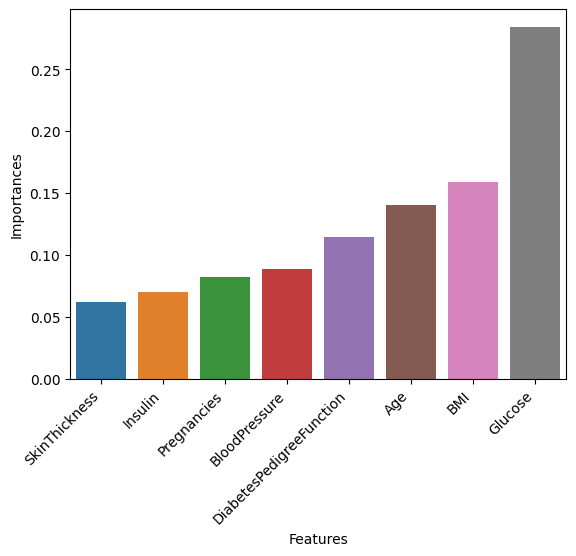

In [36]:


sns.barplot(x=feature_importances.Features,y=feature_importances.Importances)
plt.xticks(rotation=45,horizontalalignment="right")

**Para pensar: ¿Qué pasa si agregamos más estimadores para nuestro modelo de random forest?**